## 1.Big Data분석기초_연습_04_탐색적분석_확률, 통계

### 1. 기술통계&확률

0. python 패키지 불러오기

In [204]:
# 데이터 구성 패키지: Series, DataFrame
import pandas as pd
# 행렬 연산 패키지
import numpy as np

# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 통계 분석 패키지
from scipy import stats
import scipy.stats

In [205]:
import matplotlib    
import matplotlib.font_manager

[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]
 # ['NanumBarunGothic',
 # 'NanumMyeongjo',
 # 'NanumMyeongjo',
 # 'NanumGothic',
 # 'NanumBarunGothic',
 # 'NanumGothic']

['NanumGothic',
 'NanumMyeongjo',
 'NanumMyeongjo',
 'NanumBarunGothic',
 'NanumSquare',
 'NanumSquareRound',
 'NanumBarunGothic',
 'NanumGothic',
 'NanumSquareRound',
 'NanumSquare']

In [206]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

In [207]:
# 실행결과 경고메시지 출력 제외
import warnings
warnings.filterwarnings('ignore')

### 1) 연습 (기술통계) : 자동차 연비 Data Set에서 기술통계치 구하기
   - 시내에서 연비(mpg) 통계치 : 데이터 수,평균,중앙값,표준편차, min, max, Q1, Q3  
   - 자동차 모델별, mpg 통계치 : 데이터 수,평균,중앙값,표준편차, min, max, Q1, Q3 ( data.set : mycars.csv )

STEP ❶ 데이터 구성하기

In [208]:
# mycars 데이터 가져오기
mycars = pd.read_csv("/home/piai/바탕화면/01 실습파일/1 Big Data 분석 기초/mycars.csv")
mycars.head()

,manufacturer,model,displacement,year,cylinder,automatic,driving,mpg,highway_mileage,fuel,class
0,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto,f,16,26,p,compact


STEP ❷ 기술통계분석_시내/자동차 Model 별 연비(mpg) 통계치

In [209]:
# 1. 시내에서 연비(mpg) 통계치 : 기술통계량   
mycars.describe().round(2)

,displacement,year,cylinder,mpg,highway_mileage
count,234.00,234.00,234.00,234.00,234.00
mean,3.47,2003.50,5.89,16.86,23.44
std,1.29,4.51,1.61,4.26,5.95
min,1.60,1999.00,4.00,9.00,12.00
25%,2.40,1999.00,4.00,14.00,18.00
50%,3.30,2003.50,6.00,17.00,24.00
75%,4.60,2008.00,8.00,19.00,27.00
max,7.00,2008.00,8.00,35.00,44.00


In [210]:
# 2. 자동차 모델별, mpg별 통계치 : 모델별 mpg 데이터 subset
df = mycars[['model','mpg']]
df.head()

,model,mpg
0,a4,18
1,a4,21
2,a4,20
3,a4,21
4,a4,16


In [211]:
# 자동차 모델별, mpg  기술통계량
df.groupby('model').describe()

mpg                                                 \
                       count       mean       std   min    25%   50%    75%   
model                                                                         
4runner 4wd              6.0  15.166667  0.752773  14.0  15.00  15.0  15.75   
a4                       7.0  18.857143  1.864454  16.0  18.00  18.0  20.50   
a4 quattro               8.0  17.125000  1.807722  15.0  15.75  17.0  18.25   
a6 quattro               3.0  16.000000  1.000000  15.0  15.50  16.0  16.50   
altima                   6.0  20.666667  1.966384  19.0  19.00  20.0  22.50   
c1500 suburban 2wd       5.0  12.800000  1.303840  11.0  12.00  13.0  14.00   
camry                    7.0  19.857143  1.463850  18.0  18.50  21.0  21.00   
camry solara             7.0  19.857143  1.772811  18.0  18.00  21.0  21.00   
caravan 2wd             11.0  15.818182  1.834022  11.0  15.50  16.0  17.00   
civic                    9.0  24.444444  1.943651  21.0  24.00  24.0  25.00   
corolla                  5.0  25.600000  1.673320  24.0  24.00  26.0  26.00   
corvette                 5.0  15.400000  0.547723  15.0  15.00  15.0  16.00   
dakota pickup 4wd        9.0  12.777778  1.986063   9.0  11.00  14.0  14.00   
durango 4wd              7.0  11.857143  1.573592   9.0  11.00  13.0  13.00   
expedition 2wd           3.0  11.333333  0.577350  11.0  11.00  11.0  11.50   
explorer 4wd             6.0  13.666667  0.816497  13.0  13.00  13.5  14.00   
f150 pickup 4wd          7.0  13.000000  1.000000  11.0  13.00  13.0  13.50   
forester awd             6.0  18.833333  0.983192  18.0  18.00  18.5  19.75   
grand cherokee 4wd       8.0  13.500000  2.507133   9.0  12.50  14.0  15.00   
grand prix               5.0  17.000000  1.000000  16.0  16.00  17.0  18.00   
gti                      5.0  20.000000  2.000000  17.0  19.00  21.0  21.00   
impreza awd              8.0  19.625000  0.744024  19.0  19.00  19.5  20.00   
jetta                    9.0  21.222222  4.867694  16.0  19.00  21.0  21.00   
k1500 tahoe 4wd          4.0  12.500000  1.732051  11.0  11.00  12.5  14.00   
land cruiser wagon 4wd   2.0  12.000000  1.414214  11.0  11.50  12.0  12.50   
malibu                   5.0  18.800000  1.923538  17.0  18.00  18.0  19.00   
maxima                   3.0  18.666667  0.577350  18.0  18.50  19.0  19.00   
mountaineer 4wd          4.0  13.250000  0.500000  13.0  13.00  13.0  13.25   
mustang                  9.0  15.888889  1.452966  14.0  15.00  15.0  17.00   
navigator 2wd            3.0  11.333333  0.577350  11.0  11.00  11.0  11.50   
new beetle               6.0  24.000000  6.511528  19.0  20.00  20.5  27.00   
passat                   7.0  18.571429  1.902379  16.0  17.50  18.0  20.00   
pathfinder 4wd           4.0  13.750000  1.258306  12.0  13.50  14.0  14.25   
ram 1500 pickup 4wd     10.0  11.400000  1.505545   9.0  11.00  11.5  12.75   
range rover              4.0  11.500000  0.577350  11.0  11.00  11.5  12.00   
sonata                   7.0  19.000000  1.414214  18.0  18.00  18.0  20.00   
tiburon                  7.0  18.285714  1.603567  16.0  17.00  19.0  19.50   
toyota tacoma 4wd        7.0  15.571429  0.786796  15.0  15.00  15.0  16.00   

                              
                         max  
model                         
4runner 4wd             16.0  
a4                      21.0  
a4 quattro              20.0  
a6 quattro              17.0  
altima                  23.0  
c1500 suburban 2wd      14.0  
camry                   21.0  
camry solara            22.0  
caravan 2wd             18.0  
civic                   28.0  
corolla                 28.0  
corvette                16.0  
dakota pickup 4wd       15.0  
durango 4wd             13.0  
expedition 2wd          12.0  
explorer 4wd            15.0  
f150 pickup 4wd         14.0  
forester awd            20.0  
grand cherokee 4wd      17.0  
grand prix              18.0  
gti                     22.0  
impreza awd             21.0  
jetta     

###  2) 연습_ 이산형_ 기술통계
  - 제품(Cabbage)의 품질을 조사하여, 제품결함과 결함 발생한 기간을 조사한 Table.  
  - 범주형 데이터에 대해,  counts, percents, cumulative counts, cumulative percents 계산
  - ( Data set : Exh_QC1.csv )

STEP ❶ 데이터 구성하기

In [212]:
#  Exh_QC1 데이터 가져오기
QC1 = pd.read_csv("/home/piai/바탕화면/01 실습파일/1 Big Data 분석 기초/EXH_QC1.csv")
QC1.head()

,Flaws,Period,Strength,Baking Time,Cabbage weight
0,Scratch,Day,37.6,0.798922,3.6
1,Scratch,Day,38.6,0.849020,2.9
2,Peel,Day,37.2,0.816163,2.8
3,Peel,Day,36.4,0.758266,2.6
4,Smudge,Day,38.6,0.815894,3.4


In [213]:
# 제품 결함과 결함이 발생한 기간의 데이터 subset
df = QC1[['Flaws', 'Period']]
df.head()

,Flaws,Period
0,Scratch,Day
1,Scratch,Day
2,Peel,Day
3,Peel,Day
4,Smudge,Day


STEP ❷ 기술통계분석_제품결함/결함발생기간별 통계치

- Flaws 변수 Count

In [214]:
# Flaws 변수 Count: value_counts(), 순서대로 정렬: .sort_index()
count = df['Flaws'].value_counts().sort_index()
count

Other       6
Peel       15
Scratch    13
Smudge      6
Name: Flaws, dtype: int64

In [215]:
# CumCnt(cumulative counts) 계산 : cumsum()
cumcnt = np.cumsum(count)
cumcnt

Other       6
Peel       21
Scratch    34
Smudge     40
Name: Flaws, dtype: int64

In [216]:
# Percent 계산: 직접
percent = count / sum(count) * 100
percent

Other      15.0
Peel       37.5
Scratch    32.5
Smudge     15.0
Name: Flaws, dtype: float64

In [217]:
# CumPct(cumulative percents) 계산: cumsum
cumpct = np.cumsum(percent)
cumpct

Other       15.0
Peel        52.5
Scratch     85.0
Smudge     100.0
Name: Flaws, dtype: float64

In [218]:
# DataFrame으로 취합
df_count = pd.DataFrame({'Count': count, 
                         'CumCnt': cumcnt, 
                         'Percent': percent,
                         'CumPct': cumpct})
df_count

,Count,CumCnt,Percent,CumPct
Other,6,6,15.0,15.0
Peel,15,21,37.5,52.5
Scratch,13,34,32.5,85.0
Smudge,6,40,15.0,100.0


In [219]:
# Column의 name(좌측상단 이름) 생성
df_count.columns.name = 'Flaws'
df_count

Flaws,Count,CumCnt,Percent,CumPct
Other,6,6,15.0,15.0
Peel,15,21,37.5,52.5
Scratch,13,34,32.5,85.0
Smudge,6,40,15.0,100.0


- Period 변수 Count

In [220]:
# Period 변수 Count: value_count, 순서대로 정렬: sort_index 
count2 = df['Period'].value_counts().sort_index()
count2

Day         7
Evening     7
Night      19
Weekend     7
Name: Period, dtype: int64

In [221]:
# CumCnt(cumulative counts) 계산 : cumsum
cumcnt2 = np.cumsum(count2)
cumcnt2

Day         7
Evening    14
Night      33
Weekend    40
Name: Period, dtype: int64

In [222]:
# Percent 계산: 직접
percent2 = count2 / sum(count2) * 100
percent2

Day        17.5
Evening    17.5
Night      47.5
Weekend    17.5
Name: Period, dtype: float64

In [223]:
# CumPct(cumulative percents) 계산: cumsum
cumpct2 = np.cumsum(percent2)
cumpct2

Day         17.5
Evening     35.0
Night       82.5
Weekend    100.0
Name: Period, dtype: float64

In [224]:
# DataFrame으로 취합 
df_count2 = pd.DataFrame({'Count': count2,
                          'CumCnt': cumcnt2, 
                          'Percent': percent2,
                          'CumPct': cumpct2})

# Column의 name(좌측상단 이름) 생성 
df_count2.columns.name='Period'
df_count2

Period,Count,CumCnt,Percent,CumPct
Day,7,7,17.5,17.5
Evening,7,14,17.5,35.0
Night,19,33,47.5,82.5
Weekend,7,40,17.5,100.0


### 3) 연습 (정규분포 확률계산)
 - A/S 작업을 수행하는데 걸리는 시간을 측정해 본 결과 평균 115분, 표준편차 20분이 소요된다는 것을 알았음. 
 - 만일 A/S 작업시간의 허용범위가 135분 이내라면, 135분 이상 걸리는 A/S 작업비율은 어느 정도일까?

In [225]:
# 정규분포에서 누적확률 값 계산
x = 135
mu = 115
sigma = 20

# prob : 135분까지 누적확률값 계산
prob = stats.norm.cdf(x, mu, sigma)

In [226]:
# 135분 이상의 누적확률값 계산
print("{0} 분 이상 걸리는 A/S 작업 비율: {1:.1f}%".format(x, (1-prob)*100))

135 분 이상 걸리는 A/S 작업 비율: 15.9%


### 4) 연습 (정규분포 확률계산)
  - 어떤 자동차 1리터당 주행거리가 평균 12km, 표준편차 3km인 정규분포를 이룬다. 
  - 1리터를 가지고 12km 이상 15km 이하를 달릴 확률은 얼마인가?

In [227]:
# 누적확률 값 계산
x = 15
mu = 12
sigma = 3

# prob1: 15 km 이하인 누적확률값 계산
prob = stats.norm.cdf(x, mu, sigma)

In [228]:
print("{0} km ~ {1} km 달릴 확률 {2:.1f}%에 해당".format(mu, x, (prob-0.5)*100))

12 km ~ 15 km 달릴 확률 34.1%에 해당


### 6)  연습 (t 분포 확률계산)
  - 확률변수 t는 자유도가 5인  t-분포를 따른다. t 값이 1.53일 때,  P (T ≤ t)을 계산하시오

In [229]:
# t 분포 확률 계산하기
t = 1.53
df = 5

# 누적확률 값 계산
prob = stats.t.cdf(t, df)
print(" P(T<=t)= {:.1f}%".format(prob*100))

 P(T<=t)= 90.7%


### 7) 연습 (χ2 분포, 확률 계산)
  - 확률변수 χ2 는 자유도가 30 인 χ2 -분포를 따른다. 
  - χ2 값이  10 일 때,  P (X ≤ χ2 )을 계산하시오.

In [230]:
# χ2 분포, 확률 계산하기
chisq = 10
df = 30

# 누적확률 값 계산
prob = stats.chi2.cdf(chisq, df)
print("χ2 누적확률 계산 : p(X<={0}) = {1:.4f}".format(chisq, prob))

χ2 누적확률 계산 : p(X<=10) = 0.0002


### 8) 연습 (F 분포, 확률 계산)
  - 확률변수 F 는 각각 자유도가 15, 15 인  F-분포를 따른다. F 값이  2.0 일 때,  P (X ≤ F)을 계산하시오.

In [231]:
# F 분포, 확률 계산하기
f = 2.0
df_num = 15
df_den = 15

# 누적확률 값 계산
prob = stats.f.cdf(f, df_num, df_den)
print("P(X <= F): {:.3f}".format(prob))

P(X <= F): 0.904


### 9) 연습 (이항 분포)
   - 도장공정에서 광택도 불량이 40%나 된다고 함
   - 3대의 차량을 임의로 선택했을 때 불량대수가 각각 0, 1, 2, 3 대가 나올 확률은 얼마인가

In [232]:
# 이항분포에서 확률 계산하기 : pmf(k,n,p) 
n = 3      # n : 3대의 차량 수
p = 0.4    # 공정 불량

for i in range(n+1) :
   # 이항분포 Probability Mass Function
    prob = stats.binom.pmf(k=i, n=n, p=p)  
    print("P(X={0}) = {1:.3f}".format(i, prob))

P(X=0) = 0.216
P(X=1) = 0.432
P(X=2) = 0.288
P(X=3) = 0.064


## 2. 통계(추검정)

In [233]:
# 가설검정 및 통계 분석 패키지
import scipy.stats as stats
from statsmodels.formula.api import ols

# proportion test 패키지
from statsmodels.stats.proportion import proportions_ztest

# ANOVA 분석 패키지
from statsmodels.stats.anova import anova_lm

- 정규성 검정 

In [234]:
# camshaft 데이터 가져오기
df = pd.read_csv("/home/piai/바탕화면/01 실습파일/1 Big Data 분석 기초/camshaft.csv")
df.head()

,Length,Supp1,Supp2
0,601.4,598.0,601.6
1,601.6,599.8,600.4
2,598.0,600.0,598.4
3,601.4,599.8,600.0
4,599.4,600.0,596.8


In [235]:
# 정규성 검정 : Shapiro-Wilk Test
statistic, p = stats.shapiro(df['Supp1'])

print("Shapiro-Wilk Test: statistic={}, p-value={}".format(statistic, p))

Shapiro-Wilk Test: statistic=0.9788166284561157, p-value=0.1074606254696846


- 모평균 구간추정(모표준편차 알 때)

In [236]:
# 데이터 직접입력
df = pd.DataFrame({'wgt':[3.6, 2.9, 2.8, 2.6, 3.4, 3.2, 2.2, 2.6, 
                          2.6, 2.4, 2.4, 2.6, 3.4, 2.4, 2.1, 2.6, 
                          3.0, 2.4, 2.7, 2.4, 2.6, 2.9, 2.9, 2.0, 
                          2.7, 2.2, 2.8, 2.7, 1.8, 2.5, 3.0, 3.2, 
                          2.8, 2.6, 3.2, 3.1, 2.9, 2.7, 2.7, 2.2]})
df.head()

,wgt
0,3.6
1,2.9
2,2.8
3,2.6
4,3.4


In [237]:
# 정규분포 구간 추정 함수 실행 

lower, upper = stats.norm.interval(0.95, loc = np.mean(df), scale = 0.397/np.sqrt(40))
print("신뢰구간: ({0}, {1})" .format(lower.round(2), upper.round(2)))

신뢰구간: ([2.57], [2.82])


- 모평균 구간추정(모표준편차 모를 때)

In [238]:
# df를 직접 입력 
df = pd.DataFrame({'streng':[54.1, 53.3, 56.1, 55.7, 54.0, 54.1, 54.5, 
                             57.1, 55.2, 53.8, 54.1, 54.1, 56.1, 55.0, 
                             55.9, 56.0, 54.9, 54.3, 53.9, 55.0]})
df.head()

,streng
0,54.1
1,53.3
2,56.1
3,55.7
4,54.0


In [239]:
# t 분포 구간추정 함수 실행 : (loc: 평균의 값, scale: 변동 정도)  
lower, upper = stats.t.interval(0.95, len(df)-1, loc = np.mean(df), scale = stats.sem(df))
lower.round(2), upper.round(2)

(array([54.39]), array([55.33]))

- 1-Sample t-test : 모표준편차를 모를 때

In [240]:
# df를 직접 입력 
df = pd.DataFrame({'satisfaction': [74.5, 81.2, 73.8, 82.0, 76.3, 75.7, 80.2, 72.6, 
                                    77.9, 82.8]})
df.head()

,satisfaction
0,74.5
1,81.2
2,73.8
3,82.0
4,76.3


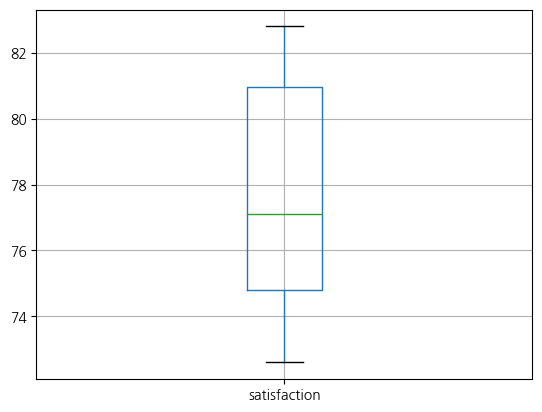

In [243]:
import matplotlib
import matplotlib.pyplot as plt

# boxplot
df.boxplot()
plt.show()

In [244]:
# satisfaction 정규성 검정: Shapiro-Wilk Test
statistic, p = stats.shapiro(df['satisfaction'])
print("statistic={}, p-value={}".format(statistic,p))

statistic=0.9331594705581665, p-value=0.4796782433986664


In [245]:
# 1-Sample t-test
t_result = stats.ttest_1samp(df, 76.7)

In [246]:
# 1-Sample t-test의 t값 p값 저장
t, p = t_result.statistic.round(3), \
       t_result.pvalue.round(3)

In [247]:
# 1-Sample t-test의 t값  p값 출력
print( "1-Sample t-test ")
print( " t 통계량 : {} " .format(t))
print( " p-value : {} " .format(p))

1-Sample t-test 
 t 통계량 : [0.864] 
 p-value : [0.41] 


- 2 Sample t-test : 두 집단 간 평균이 같은지 비교 

In [248]:
# Data직접 입력 
df = pd.DataFrame({'A': [6, 5, 5, 4, 6, 7, 6, 4, 5, 6, 4, 5, 5, 6, 4, 8, 6, 5, 6, 7], 
                   'B': [7, 6, 7, 8, 7, 8, 8, 5, 7, 6, 5, 5, 6, 6, 5, 7, 9, 7, 7, 8]})
df.head()

,A,B
0,6,7
1,5,6
2,5,7
3,4,8
4,6,7


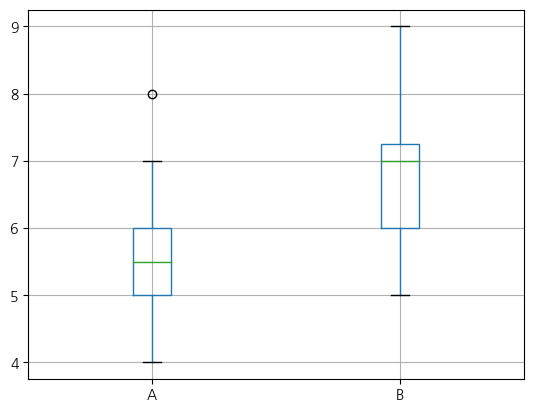

In [249]:
import matplotlib
import matplotlib.pyplot as plt

# Group별 boxplot
df.boxplot(['A','B'])
plt.show()

In [250]:
# ‘A‘, ‘B’ 정규성 검정: Shapiro-Wilk Test
statistic, p = stats.shapiro(df['A'])
print("statistic={}, p-value={}".format(statistic,p))

statistic=0.9094840288162231, p-value=0.06230909377336502


In [251]:
statistic, p = stats.shapiro(df['B'])
print("statistic={}, p-value={}".format(statistic,p))

statistic=0.914249062538147, p-value=0.07683517038822174


In [252]:
# 등분산성 검정
stats.bartlett(df['A'], df['B'])

BartlettResult(statistic=0.07848064431469153, pvalue=0.7793670509889579)

In [253]:
# 2-Sample t-test
t_result = stats.ttest_ind(df['A'], df['B'])

# 2-Sample t-test의 t값 p값 저장
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

In [254]:
# 2-Sample t-test의 t값 p값 출력
print( "2-Sample t-test ")
print( " t: {} " .format(t))
print( " p: {} " .format(p))

2-Sample t-test 
 t: -3.335 
 p: 0.002 


- Paired t-test : 짝을 이루는 집단의 평균의 차이가 있는지 검정

In [255]:
# df1, df2를 직접 입력 
df1 = pd.DataFrame({'before': [720, 589, 780, 648, 720, 589, 780, 648, 780, 648]})
df2 = pd.DataFrame({'after': [810, 670, 790, 712, 810, 670, 790, 712, 790, 712]})

# Paired t-test
t_result = stats.ttest_rel(df1, df2)

# Paired t-test의 t값 p값 저장
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

In [256]:
# Paired t-test의 t값 p값 출력
print( "Paired t-test ")
print( " t: {} " .format(t))
print( " p: {} " .format(p))

Paired t-test 
 t: [-5.324] 
 p: [0.] 


- 1 Proportion test

In [257]:
# 변수 선언 
count = 15
n_obs = 100
value = 0.1

# Proportion test 실행
z, p = proportions_ztest(count, n_obs, value)

In [258]:
# Proportion test 결과 출력
print( "1 Proportion test ")
print( ' z: {0:0.3f}' .format(z))
print( ' p: {0:0.3f}'.format(p))

1 Proportion test 
 z: 1.400
 p: 0.161


- 2 Proportion test

In [259]:
# 변수 선언 
count = np.array([4, 1])
nobs = np.array([1000, 1200])

# Proportion test 실행
z, p = proportions_ztest(count, nobs)

In [260]:
# Proportion test 결과 출력
print( "2 Proportion test ")
print( ' z: {0:0.3f}' .format(z))
print( ' p: {0:0.3f}'.format(p))

2 Proportion test 
 z: 1.553
 p: 0.120


- chi-square test

In [261]:
# df 생성  
df = pd.DataFrame({'Work_1': [270, 228, 277], 
                   'Work_2': [260, 285, 284], 
                   'Work_3': [236, 225, 231],
                   'Work_4':[234, 262, 208]})

# chi-square test 실행
chi, pval, dof, expected = stats.chi2_contingency(df)

# chi-square test 결과 출력
print( "chi-square test ")
print( ' chisq: {0:0.3f}' .format(chi))
print( ' p: {0:0.3f}'.format(pval))
print( ' degree pf freedom: {}' .format(dof))
print( ' expected value: \n{}' .format(expected.round(3)))

chi-square test 
 chisq: 13.366
 p: 0.038
 degree pf freedom: 6
 expected value: 
[[258.333 276.333 230.667 234.667]
 [258.333 276.333 230.667 234.667]
 [258.333 276.333 230.667 234.667]]


- ANOVA

In [262]:
# df 입력
df = pd.DataFrame({'A': [892, 623, 721, 678, 723, 790, 720, 670, 690, 771],
                'B': [721, 821, 910, 678, 723, 790, 711, 790, 745, 891],
                'C': [750, 915, 888, 721, 894, 834, 841, 912, 845, 889]})
df.head()

,A,B,C
0,892,721,750
1,623,821,915
2,721,910,888
3,678,678,721
4,723,723,894


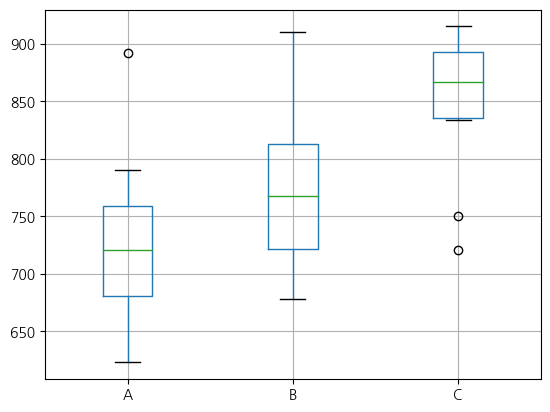

In [263]:
# Group별 boxplot 
df.boxplot(['A','B','C'])
plt.show()

In [264]:
# 'A‘. ’B’, ’C’ 정규성 검정: Shapiro-Wilk Test
f, p = stats.shapiro(df['A'])
print("statistic={}, p-value={}".format(f,p))

statistic=0.9293239712715149, p-value=0.4412756860256195


In [265]:
f, p = stats.shapiro(df['B'])
print("statistic={}, p-value={}".format(f,p))

statistic=0.924264669418335, p-value=0.39389991760253906


In [266]:
f, p = stats.shapiro(df['C'])
print("statistic={}, p-value={}".format(f,p))

statistic=0.8571338057518005, p-value=0.07058726251125336


In [267]:
# 'A‘. ’B’, ’C’ 등분산성 검정: bartlett Test
stats.bartlett(df['A'], df['B'], df['C'])

BartlettResult(statistic=0.21704722611091523, pvalue=0.8971577099320932)

In [268]:
# ANOVA 실행
f_result = stats.f_oneway(df['A'],df['B'], df['C'])

# ANOVA의 f값 p값 저장
f, p = f_result.statistic.round(3),\
       f_result.pvalue.round(3)

In [269]:
# ANOVA의 f값 p값 출력
print( "One-way ANOVA")
print( " F 통계량 : {}" .format(f))
print( " p-value : {} " .format(p))

One-way ANOVA
 F 통계량 : 6.884
 p-value : 0.004 


- Correlation Analysis

In [270]:
# df 생성  
df1 = [1, 2, 3, 4, 4, 5, 6, 6, 7, 8]
df2 = [23, 29, 49, 64, 74, 87, 96, 97, 109, 119]

# Correlation Analysis 실행
corr, pval = stats.pearsonr(df1, df2)

# Correlation, p-value 결과 출력 
print( "Correlation Analysis ")
print( ' corr: {0:0.3f}' .format(corr))
print( ' p-value : {0:0.3f}'.format(pval))

Correlation Analysis 
 corr: 0.989
 p-value : 0.000
